<a href="https://colab.research.google.com/github/Pawan-Chahar/dlthub_fundamental/blob/main/Pyspark_Advanced_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

In [5]:
!pip install duckdb

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.window import *

In [4]:
import time
import datetime

_data = [
(11114,datetime.datetime.strptime('08:30:00:00',"%H:%M:%S:%f"),"I"),
(11114,datetime.datetime.strptime('10:30:00:00',"%H:%M:%S:%f"),'O'),
(11114,datetime.datetime.strptime('11:30:00:00',"%H:%M:%S:%f"),'I'),
(11114,datetime.datetime.strptime('15:30:00:00',"%H:%M:%S:%f"),'O'),
(11115,datetime.datetime.strptime('09:30:00:00',"%H:%M:%S:%f"),'I'),
(11115,datetime.datetime.strptime('17:30:00:00',"%H:%M:%S:%f"),'O')
]
from pyspark.sql.types import StructType,StructField, TimestampType, LongType, StringType
_schema = StructType([
  StructField('emp_id', LongType(), True),
  StructField('punch_time', TimestampType(), True),
  StructField('flag', StringType(), True)
])
df = spark.createDataFrame(data = _data, schema=_schema)
df.show()

+------+-------------------+----+
|emp_id|         punch_time|flag|
+------+-------------------+----+
| 11114|1900-01-01 08:30:00|   I|
| 11114|1900-01-01 10:30:00|   O|
| 11114|1900-01-01 11:30:00|   I|
| 11114|1900-01-01 15:30:00|   O|
| 11115|1900-01-01 09:30:00|   I|
| 11115|1900-01-01 17:30:00|   O|
+------+-------------------+----+



In [ ]:
WindowSpec = Window.partitionBy('emp_id').orderBy('punch_time')

df = df.withColumn('previous_punch_time',lag(col('punch_time')).over(WindowSpec) )
df.show()

+------+-------------------+----+-------------------+
|emp_id|         punch_time|flag|previous_punch_time|
+------+-------------------+----+-------------------+
| 11114|1900-01-01 08:30:00|   I|               NULL|
| 11114|1900-01-01 10:30:00|   O|1900-01-01 08:30:00|
| 11114|1900-01-01 11:30:00|   I|1900-01-01 10:30:00|
| 11114|1900-01-01 15:30:00|   O|1900-01-01 11:30:00|
| 11115|1900-01-01 09:30:00|   I|               NULL|
| 11115|1900-01-01 17:30:00|   O|1900-01-01 09:30:00|
+------+-------------------+----+-------------------+



In [ ]:
df = df.withColumn('delta', (col('punch_time').cast('long')- col('previous_punch_time').cast('long'))/3600)


df.show()

+------+-------------------+----+-------------------+-----+
|emp_id|         punch_time|flag|previous_punch_time|delta|
+------+-------------------+----+-------------------+-----+
| 11114|1900-01-01 08:30:00|   I|               NULL| NULL|
| 11114|1900-01-01 10:30:00|   O|1900-01-01 08:30:00|  2.0|
| 11114|1900-01-01 11:30:00|   I|1900-01-01 10:30:00|  1.0|
| 11114|1900-01-01 15:30:00|   O|1900-01-01 11:30:00|  4.0|
| 11115|1900-01-01 09:30:00|   I|               NULL| NULL|
| 11115|1900-01-01 17:30:00|   O|1900-01-01 09:30:00|  8.0|
+------+-------------------+----+-------------------+-----+



In [ ]:
from pyspark.sql.functions import when

In [ ]:

df.groupBy(col('emp_id')).agg( sum(when( col('flag')== 'O', col('delta')).otherwise(0))).alias('total').show()


+------+-----------------------------------------------+
|emp_id|sum(CASE WHEN (flag = O) THEN delta ELSE 0 END)|
+------+-----------------------------------------------+
| 11114|                                            6.0|
| 11115|                                            8.0|
+------+-----------------------------------------------+



In [ ]:
df.where(col("flag")=="O").groupBy("emp_id").sum("delta").alias("total").show()

+------+----------+
|emp_id|sum(delta)|
+------+----------+
| 11114|       6.0|
| 11115|       8.0|
+------+----------+



Question

In [ ]:
_data = [(1,'Abbot'),(2,'Doris'),(3,'Emerson'),(4,'Green'),(5,'Jeames')]
_schema = ['id', 'student']


df = spark.createDataFrame(data = _data, schema=_schema)
df.show()


+---+-------+
| id|student|
+---+-------+
|  1|  Abbot|
|  2|  Doris|
|  3|Emerson|
|  4|  Green|
|  5| Jeames|
+---+-------+



Method-1

In [ ]:
df= df.withColumn('new_id', (when(col('id')%2== 0 , col('id')-1).otherwise(col('id')+1)))
df.show()

+---+-------+------+
| id|student|new_id|
+---+-------+------+
|  1|  Abbot|     2|
|  2|  Doris|     1|
|  3|Emerson|     4|
|  4|  Green|     3|
|  5| Jeames|     6|
+---+-------+------+



In [ ]:
df.select(col('new_id').alias('id'),col('student')).orderBy('new_id').show()

+---+-------+
| id|student|
+---+-------+
|  1|  Doris|
|  2|  Abbot|
|  3|  Green|
|  4|Emerson|
|  6| Jeames|
+---+-------+



Method-2


In [ ]:
_data = [(1,'Abbot'),(2,'Doris'),(3,'Emerson'),(4,'Green'),(5,'Jeames')]
_schema = ['id', 'student']


df = spark.createDataFrame(data = _data, schema=_schema)





WindowSpec = Window.orderBy('id')

df = df.withColumn('next_student',lead(col('student')).over(WindowSpec)) \
       .withColumn('previous_student' , lag(col('student')).over(WindowSpec))

df.show()

+---+-------+------------+----------------+
| id|student|next_student|previous_student|
+---+-------+------------+----------------+
|  1|  Abbot|       Doris|            NULL|
|  2|  Doris|     Emerson|           Abbot|
|  3|Emerson|       Green|           Doris|
|  4|  Green|      Jeames|         Emerson|
|  5| Jeames|        NULL|           Green|
+---+-------+------------+----------------+



In [ ]:
df.withColumn('new_student', when(col('id')%2 !=0, coalesce(col('next_student'),col('student'))).otherwise('previous_student')).show()

+---+-------+------------+----------------+----------------+
| id|student|next_student|previous_student|     new_student|
+---+-------+------------+----------------+----------------+
|  1|  Abbot|       Doris|            NULL|           Doris|
|  2|  Doris|     Emerson|           Abbot|previous_student|
|  3|Emerson|       Green|           Doris|           Green|
|  4|  Green|      Jeames|         Emerson|previous_student|
|  5| Jeames|        NULL|           Green|          Jeames|
+---+-------+------------+----------------+----------------+



"pwc question and answer" in PySpark
"PySpark question and answer"

# **Question:**

Retrive the information about consecutive login streaks for employees who have logged in for at least two consecutive days.

For each employee provide the emp_id, the number of consecutive days logged in, the start date of the streak and end date of the strek


In [ ]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
from pyspark.sql.functions import to_date

In [ ]:

data = [(101,'02-01-2024','N'),
(101,'03-01-2024','Y'),
(101,'04-01-2024','N'),
(101,'07-01-2024','Y'),
(102,'01-01-2024','N'),
(102,'02-01-2024','Y'),
(102,'03-01-2024','Y'),
(102,'04-01-2024','N'),
(102,'05-01-2024','Y'),
(102,'06-01-2024','Y'),
(102,'07-01-2024','Y'),
(103,'01-01-2024','N'),
(103,'04-01-2024','N'),
(103,'05-01-2024','Y'),
(103,'06-01-2024','Y'),
(103,'07-01-2024','N')
]
#schema = ["emp_id" , "log_date" , "flag"]

schema = StructType([ \
    StructField("emp_id",StringType(),True), \
    StructField("log_date",StringType(),True), \
    StructField("flag",StringType(),True) \
  ])


# creating the dataframe
df = spark.createDataFrame(data = data , schema = schema)
df.show()


+------+----------+----+
|emp_id|  log_date|flag|
+------+----------+----+
|   101|02-01-2024|   N|
|   101|03-01-2024|   Y|
|   101|04-01-2024|   N|
|   101|07-01-2024|   Y|
|   102|01-01-2024|   N|
|   102|02-01-2024|   Y|
|   102|03-01-2024|   Y|
|   102|04-01-2024|   N|
|   102|05-01-2024|   Y|
|   102|06-01-2024|   Y|
|   102|07-01-2024|   Y|
|   103|01-01-2024|   N|
|   103|04-01-2024|   N|
|   103|05-01-2024|   Y|
|   103|06-01-2024|   Y|
|   103|07-01-2024|   N|
+------+----------+----+



In [ ]:
df.printSchema()

root
 |-- emp_id: string (nullable = true)
 |-- log_date: date (nullable = true)
 |-- flag: string (nullable = true)



In [ ]:
df =df.withColumn('log_date', to_date(col('log_date'), 'dd-MM-yyyy'))

df.show()

+------+----------+----+
|emp_id|  log_date|flag|
+------+----------+----+
|   101|2024-01-02|   N|
|   101|2024-01-03|   Y|
|   101|2024-01-04|   N|
|   101|2024-01-07|   Y|
|   102|2024-01-01|   N|
|   102|2024-01-02|   Y|
|   102|2024-01-03|   Y|
|   102|2024-01-04|   N|
|   102|2024-01-05|   Y|
|   102|2024-01-06|   Y|
|   102|2024-01-07|   Y|
|   103|2024-01-01|   N|
|   103|2024-01-04|   N|
|   103|2024-01-05|   Y|
|   103|2024-01-06|   Y|
|   103|2024-01-07|   N|
+------+----------+----+



In [ ]:
to_date(col('Date'), 'M/d/yyyy').alias('Date').cast('date')

In [ ]:
# first filter out office going person use "Y"


df= df.filter(col('flag')== 'Y')\
    .withColumn('rn', row_number().over(Window.orderBy(col('emp_id'),col('log_date'))))\
        .withColumn('log_date', to_date(col('log_date'), 'dd-MM-yyyy')) \
            .withColumn('diff' , date_sub(col('log_date') , col('rn').cast('Integer'))).orderBy(['emp_id','log_date'])
df.show()

+------+----------+----+---+----------+
|emp_id|  log_date|flag| rn|      diff|
+------+----------+----+---+----------+
|   101|2024-01-03|   Y|  1|2024-01-02|
|   101|2024-01-07|   Y|  2|2024-01-05|
|   102|2024-01-02|   Y|  3|2023-12-30|
|   102|2024-01-03|   Y|  4|2023-12-30|
|   102|2024-01-05|   Y|  5|2023-12-31|
|   102|2024-01-06|   Y|  6|2023-12-31|
|   102|2024-01-07|   Y|  7|2023-12-31|
|   103|2024-01-05|   Y|  8|2023-12-28|
|   103|2024-01-06|   Y|  9|2023-12-28|
+------+----------+----+---+----------+



In [ ]:

WindowSpec = Window.partitionBy('diff')

df.withColumn('num_of_day', count(col('emp_id')).over(WindowSpec))\
    .withColumn('start_date' ,first_value('log_date').over(WindowSpec)) \
        .withColumn('end_date' ,last_value('log_date').over(WindowSpec)) \
            .filter(col('num_of_day')>= 2) \
                .select(['emp_id','start_date','end_date','num_of_day']).distinct() \
                    .show()

+------+----------+----------+----------+
|emp_id|start_date|  end_date|num_of_day|
+------+----------+----------+----------+
|   103|2024-01-05|2024-01-06|         2|
|   102|2024-01-02|2024-01-03|         2|
|   102|2024-01-05|2024-01-07|         3|
+------+----------+----------+----------+



**Question:**

Find out duplicates record in data

In [ ]:
schema = StructType([
    StructField("emp_id", IntegerType(), True),
    StructField("emp_name", StringType(), True),
    StructField("emp_gender", StringType(), True),
    StructField("emp_age", IntegerType(), True),
    StructField("emp_salary", IntegerType(), True),
    StructField("emp_manager", StringType(), True)
])

#creating the dataframe
data = [
    (1, "Arjun Patel", "Male", 30, 60000, "Aarav Sharma"),
    (2, "Aarav Sharma", "Male", 28, 55000, "Zara Singh"),
    (3, "Zara Singh", "Female", 35, 70000, "Arjun Patel"),
    (4, "Priya Reddy", "Female", 32, 65000, "Aarav Sharma"),
    (1, "Arjun Patel", "Male", 30, 60000, "Aarav Sharma"),
    (6, "Naina Verma", "Female", 31, 72000, "Arjun Patel"),
    (1, "Arjun Patel", "Male", 30, 60000, "Aarav Sharma"),
    (4, "Priya Reddy", "Female", 32, 65000, "Aarav Sharma"),
    (5, "Aditya Kapoor", "Male", 28, 58000, "Zara Singh"),
    (10, "Anaya Joshi", "Female", 27, 59000, "Aarav Sharma"),
    (11, "Rohan Malhotra", "Male", 36, 73000, "Zara Singh"),
    (3, "Zara Singh", "Female", 35, 70000, "Arjun Patel")
]


df = spark.createDataFrame(data, schema=schema)
df.show()


+------+--------------+----------+-------+----------+------------+
|emp_id|      emp_name|emp_gender|emp_age|emp_salary| emp_manager|
+------+--------------+----------+-------+----------+------------+
|     1|   Arjun Patel|      Male|     30|     60000|Aarav Sharma|
|     2|  Aarav Sharma|      Male|     28|     55000|  Zara Singh|
|     3|    Zara Singh|    Female|     35|     70000| Arjun Patel|
|     4|   Priya Reddy|    Female|     32|     65000|Aarav Sharma|
|     1|   Arjun Patel|      Male|     30|     60000|Aarav Sharma|
|     6|   Naina Verma|    Female|     31|     72000| Arjun Patel|
|     1|   Arjun Patel|      Male|     30|     60000|Aarav Sharma|
|     4|   Priya Reddy|    Female|     32|     65000|Aarav Sharma|
|     5| Aditya Kapoor|      Male|     28|     58000|  Zara Singh|
|    10|   Anaya Joshi|    Female|     27|     59000|Aarav Sharma|
|    11|Rohan Malhotra|      Male|     36|     73000|  Zara Singh|
|     3|    Zara Singh|    Female|     35|     70000| Arjun Pa

In [ ]:
df.columns

['emp_id', 'emp_name', 'emp_gender', 'emp_age', 'emp_salary', 'emp_manager']

In [ ]:
df.groupBy(['emp_id' ,'emp_name' ,'emp_gender' , 'emp_age' ,'emp_salary' ,'emp_manager']).agg(count('emp_id').alias('count')) \
    .filter(col('count') > 1).show()

+------+-----------+----------+-------+----------+------------+-----+
|emp_id|   emp_name|emp_gender|emp_age|emp_salary| emp_manager|count|
+------+-----------+----------+-------+----------+------------+-----+
|     1|Arjun Patel|      Male|     30|     60000|Aarav Sharma|    3|
|     4|Priya Reddy|    Female|     32|     65000|Aarav Sharma|    2|
|     3| Zara Singh|    Female|     35|     70000| Arjun Patel|    2|
+------+-----------+----------+-------+----------+------------+-----+



In [ ]:
WindowSpec = Window.partitionBy(['emp_id' ,'emp_name' ,'emp_gender' , 'emp_age' ,'emp_salary' ,'emp_manager'])

df.withColumn('count' , count('emp_id').over(WindowSpec)) \
   .filter(col('count') > 1) \
   .select('*').distinct().show()

+------+-----------+----------+-------+----------+------------+-----+
|emp_id|   emp_name|emp_gender|emp_age|emp_salary| emp_manager|count|
+------+-----------+----------+-------+----------+------------+-----+
|     1|Arjun Patel|      Male|     30|     60000|Aarav Sharma|    3|
|     3| Zara Singh|    Female|     35|     70000| Arjun Patel|    2|
|     4|Priya Reddy|    Female|     32|     65000|Aarav Sharma|    2|
+------+-----------+----------+-------+----------+------------+-----+



In [ ]:
df.count()

12

In [ ]:
df_unique = df.dropDuplicates()

df_unique.show()

+------+--------------+----------+-------+----------+------------+
|emp_id|      emp_name|emp_gender|emp_age|emp_salary| emp_manager|
+------+--------------+----------+-------+----------+------------+
|     1|   Arjun Patel|      Male|     30|     60000|Aarav Sharma|
|     3|    Zara Singh|    Female|     35|     70000| Arjun Patel|
|     6|   Naina Verma|    Female|     31|     72000| Arjun Patel|
|     2|  Aarav Sharma|      Male|     28|     55000|  Zara Singh|
|     4|   Priya Reddy|    Female|     32|     65000|Aarav Sharma|
|     5| Aditya Kapoor|      Male|     28|     58000|  Zara Singh|
|    11|Rohan Malhotra|      Male|     36|     73000|  Zara Singh|
|    10|   Anaya Joshi|    Female|     27|     59000|Aarav Sharma|
+------+--------------+----------+-------+----------+------------+



In [ ]:
df_group_unique = df.groupBy(df.columns).agg(count('emp_id').alias('count'))

In [ ]:
df_group_unique.drop('count').show()

+------+--------------+----------+-------+----------+------------+
|emp_id|      emp_name|emp_gender|emp_age|emp_salary| emp_manager|
+------+--------------+----------+-------+----------+------------+
|     2|  Aarav Sharma|      Male|     28|     55000|  Zara Singh|
|     1|   Arjun Patel|      Male|     30|     60000|Aarav Sharma|
|     4|   Priya Reddy|    Female|     32|     65000|Aarav Sharma|
|     6|   Naina Verma|    Female|     31|     72000| Arjun Patel|
|     3|    Zara Singh|    Female|     35|     70000| Arjun Patel|
|    11|Rohan Malhotra|      Male|     36|     73000|  Zara Singh|
|    10|   Anaya Joshi|    Female|     27|     59000|Aarav Sharma|
|     5| Aditya Kapoor|      Male|     28|     58000|  Zara Singh|
+------+--------------+----------+-------+----------+------------+



Quantile record value fetch

Read the third quarter (25%) of emp_dataframe

In [ ]:
emp_data = [("Alice", 28),
 ("Bob", 35),
 ("Charlie", 42),
 ("David", 25),
 ("Eva", 31),
 ("Frank", 38),
 ("Grace", 45),
 ("Henry", 29)]

emp_schema = "name string , age int"

# Create Dataframe
df = spark.createDataFrame(data = emp_data , schema = emp_schema)
df.show()

+-------+---+
|   name|age|
+-------+---+
|  Alice| 28|
|    Bob| 35|
|Charlie| 42|
|  David| 25|
|    Eva| 31|
|  Frank| 38|
|  Grace| 45|
|  Henry| 29|
+-------+---+



In [ ]:
df_result= df.withColumn('Quantile', ntile(4).over(Window.orderBy(df.columns)))

df_result.show()


df_result.filter(col('Quantile') == 3).select(df.columns).show()

+-------+---+--------+
|   name|age|Quantile|
+-------+---+--------+
|  Alice| 28|       1|
|    Bob| 35|       1|
|Charlie| 42|       2|
|  David| 25|       2|
|    Eva| 31|       3|
|  Frank| 38|       3|
|  Grace| 45|       4|
|  Henry| 29|       4|
+-------+---+--------+

+-----+---+
| name|age|
+-----+---+
|  Eva| 31|
|Frank| 38|
+-----+---+



In [ ]:
df.withColumn('rn', row_number().over(Window.orderBy(df.columns))) \
   .withColumn('qutile', col('rn').cast("Integer")/4).show()

+-------+---+---+------+
|   name|age| rn|qutile|
+-------+---+---+------+
|  Alice| 28|  1|  0.25|
|    Bob| 35|  2|   0.5|
|Charlie| 42|  3|  0.75|
|  David| 25|  4|   1.0|
|    Eva| 31|  5|  1.25|
|  Frank| 38|  6|   1.5|
|  Grace| 45|  7|  1.75|
|  Henry| 29|  8|   2.0|
+-------+---+---+------+



![image.png](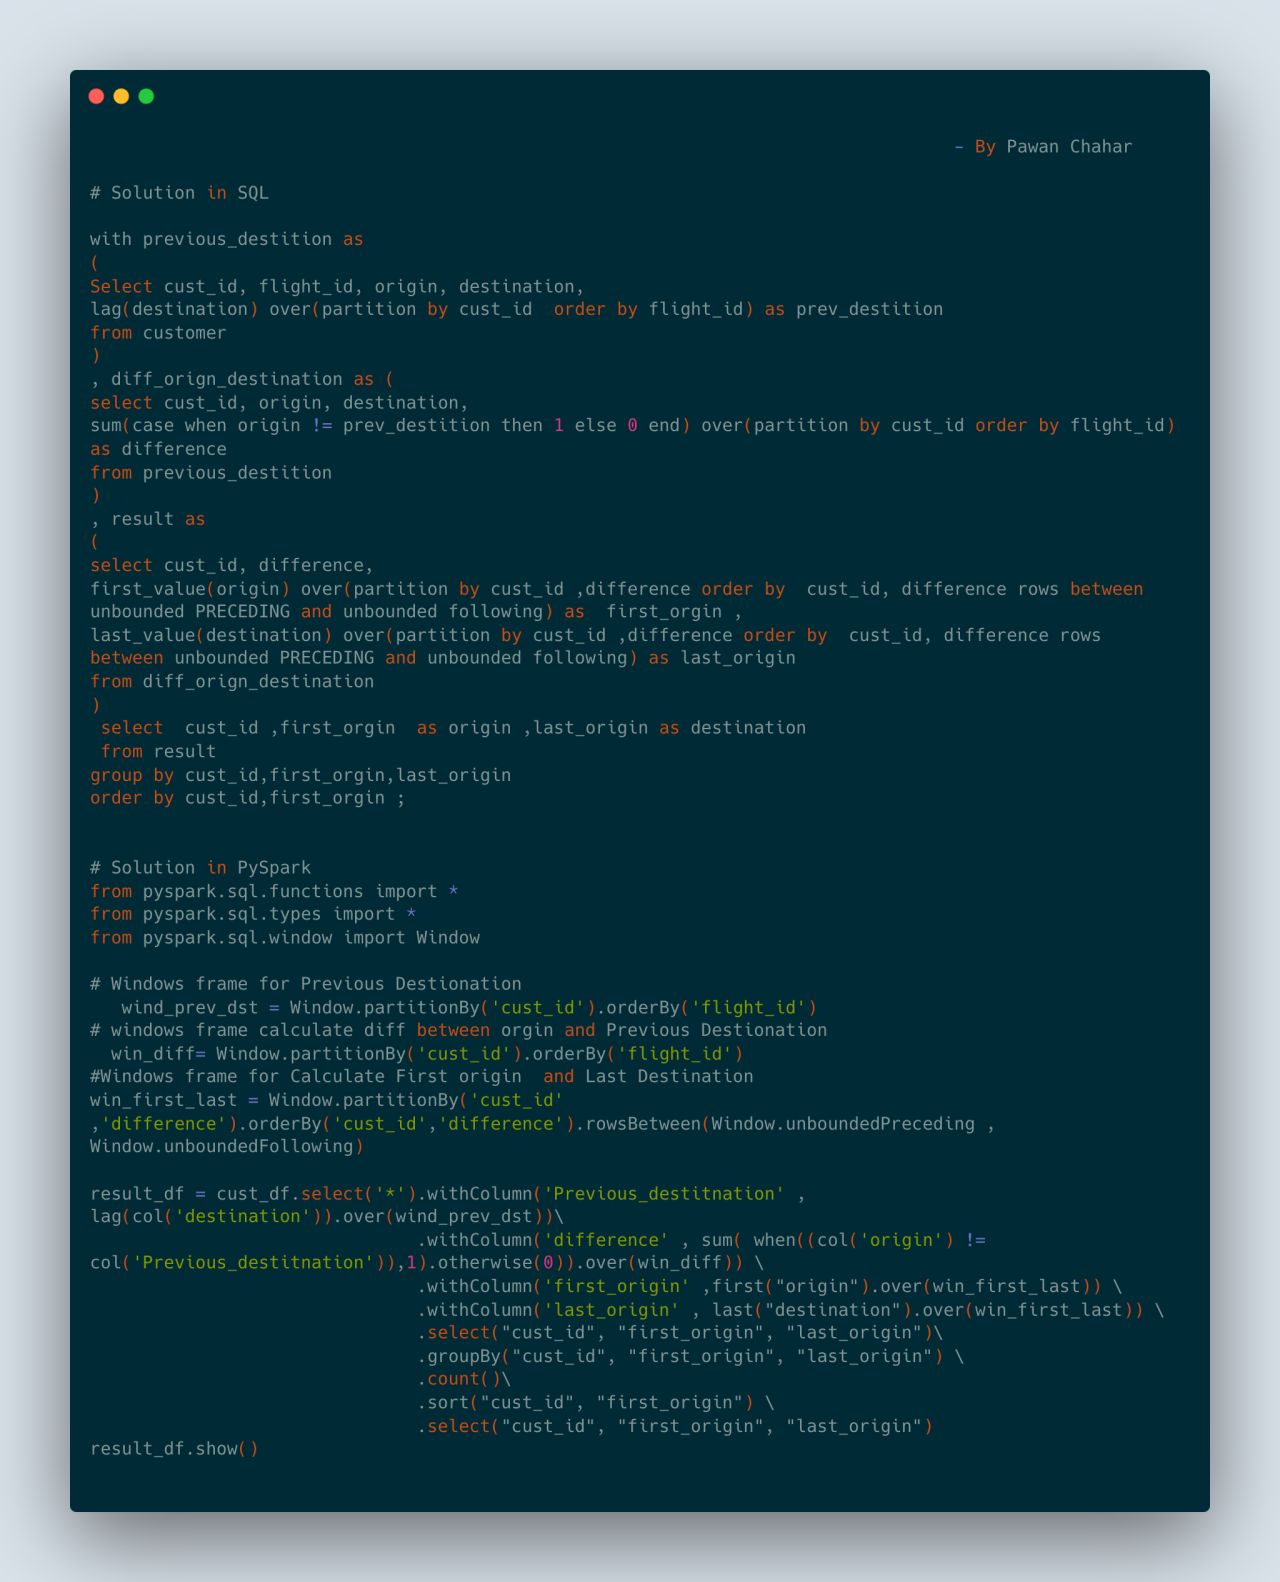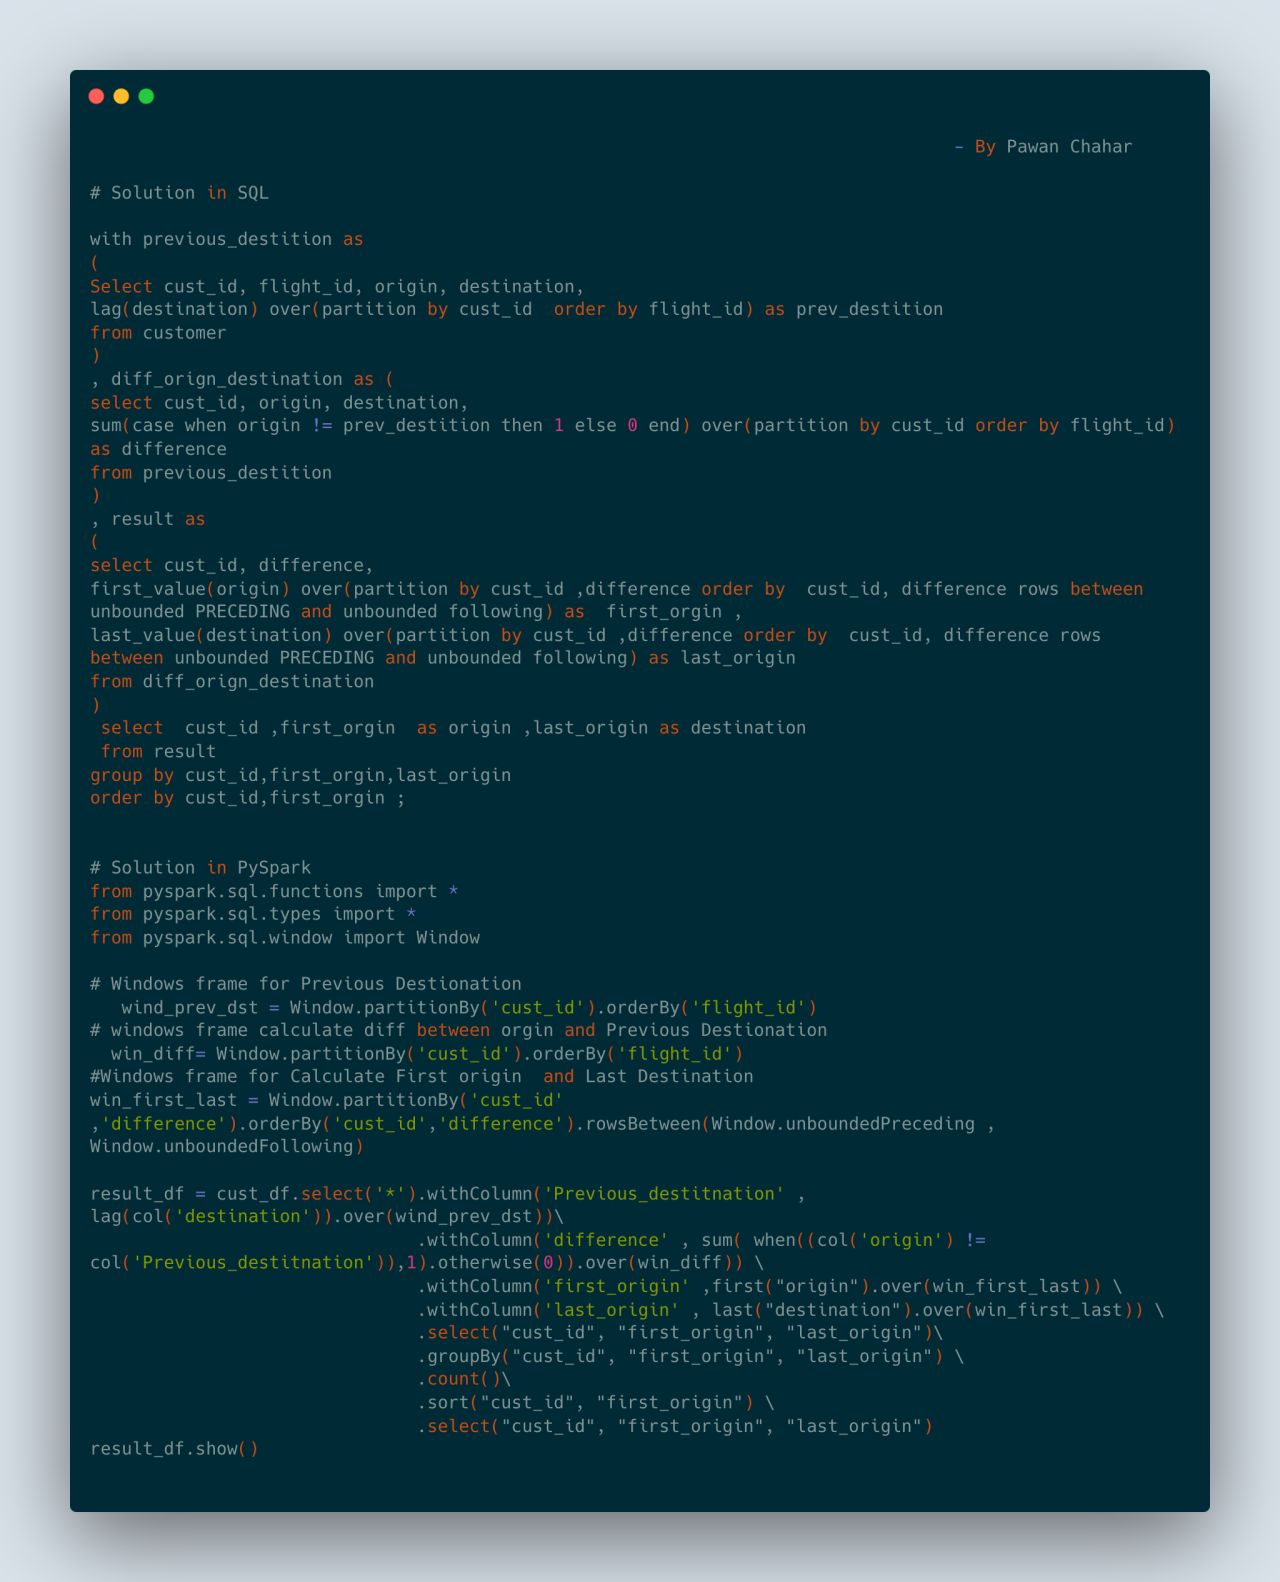)

In [ ]:
%%sql

-- Create the Flights table
CREATE TABLE Flights (
    cust_id INT NOT NULL,
    flight_id VARCHAR(50) NOT NULL,
    origin VARCHAR(100) NOT NULL,
    destination VARCHAR(100) NOT NULL,
    PRIMARY KEY (cust_id, flight_id)
);

-- Insert data into the Flights table
INSERT INTO Flights (cust_id, flight_id, origin, destination) VALUES
    (1, 'Flight2', 'Goa', 'Kochi'),
    (1, 'Flight1', 'Delhi', 'Goa'),
    (1, 'Flight3', 'Kochi', 'Hyderabad'),
    (2, 'Flight1', 'Pune', 'Chennai'),
    (2, 'Flight2', 'Chennai', 'Pune'),
    (3, 'Flight1', 'Mumbai', 'Bangalore'),
    (3, 'Flight2', 'Bangalore', 'Ayodhya'),
    (4, 'Flight1', 'Ahmedabad', 'Indore'),
    (4, 'Flight2', 'Indore', 'Kolkata'),
    (4, 'Flight3', 'Ranchi', 'Delhi'),
    (4, 'Flight4', 'Delhi', 'Mumbai');


**Solution in SQL**


In [ ]:
%%sql

WITH previous_destition AS (
    SELECT cust_id, flight_id, origin, destination,
    LAG(destination) OVER(PARTITION BY cust_id ORDER BY flight_id) AS prev_destition
    FROM customer
),
diff_origin_destination AS (
    SELECT cust_id, origin, destination,
    SUM(CASE WHEN origin != prev_destition THEN 1 ELSE 0 END) OVER(PARTITION BY cust_id ORDER BY flight_id) AS difference
    FROM previous_destition
),
result AS (
    SELECT cust_id, difference,
    FIRST_VALUE(origin) OVER(PARTITION BY cust_id, difference ORDER BY cust_id, difference ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS first_origin,
    LAST_VALUE(destination) OVER(PARTITION BY cust_id, difference ORDER BY cust_id, difference ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_origin
    FROM diff_origin_destination
)
SELECT cust_id, first_origin AS origin, last_origin AS destination
FROM result
GROUP BY cust_id, first_origin, last_origin
ORDER BY cust_id, first_origin;


**Solution in PySpark**

In [ ]:
flights_data = [(1, 'Flight2', 'Goa', 'Kochi'),
                (1, 'Flight1', 'Delhi', 'Goa'),
                (1, 'Flight3', 'Kochi', 'Hyderabad'),
                (2, 'Flight1', 'Pune', 'Chennai'),
                (2, 'Flight2', 'Chennai', 'Pune'),
                (3, 'Flight1', 'Mumbai', 'Bangalore'),
                (3, 'Flight2', 'Bangalore', 'Ayodhya'),
                (4, 'Flight1', 'Ahmedabad', 'Indore'),
                (4, 'Flight2', 'Indore', 'Kolkata'),
                (4, 'Flight3', 'Ranchi', 'Delhi'),
                (4, 'Flight4', 'Delhi', 'Mumbai'),
                (4, 'Flight5', 'Jaipur','Kochi'),
                (4, 'Flight6', 'Kochi','Bhopal')
                ]

schema = "cust_id int, flight_id string , origin string , destination string"

cust_df = spark.createDataFrame(data = flights_data , schema= schema)
cust_df.show()

+-------+---------+---------+-----------+
|cust_id|flight_id|   origin|destination|
+-------+---------+---------+-----------+
|      1|  Flight2|      Goa|      Kochi|
|      1|  Flight1|    Delhi|        Goa|
|      1|  Flight3|    Kochi|  Hyderabad|
|      2|  Flight1|     Pune|    Chennai|
|      2|  Flight2|  Chennai|       Pune|
|      3|  Flight1|   Mumbai|  Bangalore|
|      3|  Flight2|Bangalore|    Ayodhya|
|      4|  Flight1|Ahmedabad|     Indore|
|      4|  Flight2|   Indore|    Kolkata|
|      4|  Flight3|   Ranchi|      Delhi|
|      4|  Flight4|    Delhi|     Mumbai|
|      4|  Flight5|   Jaipur|      Kochi|
|      4|  Flight6|    Kochi|     Bhopal|
+-------+---------+---------+-----------+



In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window

# Window frame for Previous Destination
win_prev_dst = Window.partitionBy('cust_id').orderBy('flight_id')

# Window frame to calculate difference between origin and Previous Destination
win_diff = Window.partitionBy('cust_id').orderBy('flight_id')

# Window frame to Calculate First origin and Last Destination
win_first_last = Window.partitionBy('cust_id', 'difference').orderBy('cust_id', 'difference').rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

result_df = cust_df.select('*').withColumn('Previous_destintation',
                   lag(col('destination')).over(win_prev_dst)) \
           .withColumn('difference', sum(when(col('origin') != col('Previous_destintation'), 1).otherwise(0)).over(win_diff)) \
           .withColumn('first_origin', first("origin").over(win_first_last)) \
           .withColumn('last_origin', last("destination").over(win_first_last)) \
           .select("cust_id", "first_origin", "last_origin") \
           .groupBy("cust_id", "first_origin", "last_origin").count() \
           .sort("cust_id", "first_origin") \
           .select("cust_id", "first_origin", "last_origin")

result_df.show()


+-------+------------+-----------+
|cust_id|first_origin|last_origin|
+-------+------------+-----------+
|      1|       Delhi|  Hyderabad|
|      2|        Pune|       Pune|
|      3|      Mumbai|    Ayodhya|
|      4|   Ahmedabad|    Kolkata|
|      4|      Jaipur|     Bhopal|
|      4|      Ranchi|     Mumbai|
+-------+------------+-----------+



Find the Origin and destination of each customer.

In [ ]:
flights_data = [(1,'Flight1' , 'Delhi' , 'Hyderabad'),
                (1,'Flight2' , 'Hyderabad' , 'Kochi'),
                (1,'Flight3' , 'Kochi' , 'Mangalore'),
                (2,'Flight1' , 'Mumbai' , 'Ayodhya'),
                (2,'Flight2' , 'Ayodhya' , 'Gorakhpur')
                ]

_schema = "cust_id int, flight_id string , origin string , destination string"

df_flight = spark.createDataFrame(data = flights_data , schema= _schema)
df_flight.show()

+-------+---------+---------+-----------+
|cust_id|flight_id|   origin|destination|
+-------+---------+---------+-----------+
|      1|  Flight1|    Delhi|  Hyderabad|
|      1|  Flight2|Hyderabad|      Kochi|
|      1|  Flight3|    Kochi|  Mangalore|
|      2|  Flight1|   Mumbai|    Ayodhya|
|      2|  Flight2|  Ayodhya|  Gorakhpur|
+-------+---------+---------+-----------+



In [ ]:

WindowSpec = Window.partitionBy('cust_id').orderBy('cust_id' ,'flight_id').rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)


result_df = df_flight.withColumn('start', first('origin').over(WindowSpec)) \
            .withColumn('end', last('destination').over(WindowSpec))

result_df.show()
result_df.select(col('cust_id'),col('start').alias('origin'),col('end').alias('destination')).distinct().show()

+-------+---------+---------+-----------+------+---------+
|cust_id|flight_id|   origin|destination| start|      end|
+-------+---------+---------+-----------+------+---------+
|      1|  Flight1|    Delhi|  Hyderabad| Delhi|Mangalore|
|      1|  Flight2|Hyderabad|      Kochi| Delhi|Mangalore|
|      1|  Flight3|    Kochi|  Mangalore| Delhi|Mangalore|
|      2|  Flight1|   Mumbai|    Ayodhya|Mumbai|Gorakhpur|
|      2|  Flight2|  Ayodhya|  Gorakhpur|Mumbai|Gorakhpur|
+-------+---------+---------+-----------+------+---------+

+-------+------+-----------+
|cust_id|origin|destination|
+-------+------+-----------+
|      1| Delhi|  Mangalore|
|      2|Mumbai|  Gorakhpur|
+-------+------+-----------+



In [ ]:

# Window frame for Previous Destination
win_prev_dst = Window.partitionBy('cust_id').orderBy('flight_id')

# Window frame to calculate difference between origin and Previous Destination
win_diff = Window.partitionBy('cust_id').orderBy('flight_id')

# Window frame to Calculate First origin and Last Destination
win_first_last = Window.partitionBy('cust_id', 'difference').orderBy('cust_id', 'difference').rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)





cust_df.select('*').withColumn('Previous_destintation',
                   lag(col('destination')).over(win_prev_dst)) \
           .withColumn('difference', sum(when(col('origin') != col('Previous_destintation'), 1).otherwise(0)).over(win_diff)) \
           .withColumn('first_origin', first("origin").over(win_first_last)) \
           .withColumn('last_origin', last("destination").over(win_first_last)).show()
        #    .select("cust_id", "first_origin", "last_origin") \
        #    .groupBy("cust_id", "first_origin", "last_origin").count() \
        #    .sort("cust_id", "first_origin") \
        #    .select("cust_id", "first_origin", "last_origin")

+-------+---------+---------+-----------+---------------------+----------+------------+-----------+
|cust_id|flight_id|   origin|destination|Previous_destintation|difference|first_origin|last_origin|
+-------+---------+---------+-----------+---------------------+----------+------------+-----------+
|      1|  Flight1|    Delhi|        Goa|                 NULL|         0|       Delhi|  Hyderabad|
|      1|  Flight2|      Goa|      Kochi|                  Goa|         0|       Delhi|  Hyderabad|
|      1|  Flight3|    Kochi|  Hyderabad|                Kochi|         0|       Delhi|  Hyderabad|
|      2|  Flight1|     Pune|    Chennai|                 NULL|         0|        Pune|       Pune|
|      2|  Flight2|  Chennai|       Pune|              Chennai|         0|        Pune|       Pune|
|      3|  Flight1|   Mumbai|  Bangalore|                 NULL|         0|      Mumbai|    Ayodhya|
|      3|  Flight2|Bangalore|    Ayodhya|            Bangalore|         0|      Mumbai|    Ayodhya|


Scenrio 2:

In [ ]:
# Create DataFrame Code :


data = [ ('c1', 'New York', 'Lima'),
    ('c1', 'London', 'New York'),
    ('c1', 'Lima', 'Sao Paulo'),
    ('c1', 'Sao Paulo', 'New Delhi'),
    ('c2', 'Mumbai', 'Hyderabad'),
    ('c2', 'Surat', 'Pune'),
    ('c2', 'Hyderabad', 'Surat'),
    ('c3', 'Kochi', 'Kurnool'),
    ('c3', 'Lucknow', 'Agra'),
    ('c3', 'Agra', 'Jaipur'),
    ('c3', 'Jaipur', 'Kochi')]

schema = "customer string , start_location string , end_location string"
df = spark.createDataFrame(data = data , schema = schema)
df.show()

+--------+--------------+------------+
|customer|start_location|end_location|
+--------+--------------+------------+
|      c1|      New York|        Lima|
|      c1|        London|    New York|
|      c1|          Lima|   Sao Paulo|
|      c1|     Sao Paulo|   New Delhi|
|      c2|        Mumbai|   Hyderabad|
|      c2|         Surat|        Pune|
|      c2|     Hyderabad|       Surat|
|      c3|         Kochi|     Kurnool|
|      c3|       Lucknow|        Agra|
|      c3|          Agra|      Jaipur|
|      c3|        Jaipur|       Kochi|
+--------+--------------+------------+



In [ ]:
# Getting start_loc dataframe and end_loc dataframe

df_start = df.select('customer' ,'start_location')
df_start.show()

df_end = df.select('customer' ,'end_location')
df_end.show()

+--------+--------------+
|customer|start_location|
+--------+--------------+
|      c1|      New York|
|      c1|        London|
|      c1|          Lima|
|      c1|     Sao Paulo|
|      c2|        Mumbai|
|      c2|         Surat|
|      c2|     Hyderabad|
|      c3|         Kochi|
|      c3|       Lucknow|
|      c3|          Agra|
|      c3|        Jaipur|
+--------+--------------+

+--------+------------+
|customer|end_location|
+--------+------------+
|      c1|        Lima|
|      c1|    New York|
|      c1|   Sao Paulo|
|      c1|   New Delhi|
|      c2|   Hyderabad|
|      c2|        Pune|
|      c2|       Surat|
|      c3|     Kurnool|
|      c3|        Agra|
|      c3|      Jaipur|
|      c3|       Kochi|
+--------+------------+



In [ ]:
df_start.join(df_end , )

In [ ]:
# Performing the union of start_loc and end_loc dataframe

df_union = df_start.union(df_end)
df_union.show()

+--------+--------------+
|customer|start_location|
+--------+--------------+
|      c1|      New York|
|      c1|        London|
|      c1|          Lima|
|      c1|     Sao Paulo|
|      c2|        Mumbai|
|      c2|         Surat|
|      c2|     Hyderabad|
|      c3|         Kochi|
|      c3|       Lucknow|
|      c3|          Agra|
|      c3|        Jaipur|
|      c1|          Lima|
|      c1|      New York|
|      c1|     Sao Paulo|
|      c1|     New Delhi|
|      c2|     Hyderabad|
|      c2|          Pune|
|      c2|         Surat|
|      c3|       Kurnool|
|      c3|          Agra|
+--------+--------------+
only showing top 20 rows



In [ ]:
df_unique = df_union.groupBy(col('customer') , col('start_location').alias('loc')).agg(count(lit(1)).alias('cn')).filter(col('cn')==1).drop('cn').orderBy('customer')
df_unique.show()

+--------+---------+
|customer|      loc|
+--------+---------+
|      c1|   London|
|      c1|New Delhi|
|      c2|   Mumbai|
|      c2|     Pune|
|      c3|  Lucknow|
|      c3|  Kurnool|
+--------+---------+



In [ ]:
result_df = df.join(df_unique , on = ((df.customer == df_unique.customer) & ((df.start_location == df_unique.loc) |(df.end_location == df_unique.loc))), how='inner').drop(df.customer)

result_df.show()

+--------------+------------+--------+---------+
|start_location|end_location|customer|      loc|
+--------------+------------+--------+---------+
|        London|    New York|      c1|   London|
|     Sao Paulo|   New Delhi|      c1|New Delhi|
|        Mumbai|   Hyderabad|      c2|   Mumbai|
|         Kochi|     Kurnool|      c3|  Kurnool|
|       Lucknow|        Agra|      c3|  Lucknow|
|         Surat|        Pune|      c2|     Pune|
+--------------+------------+--------+---------+



In [ ]:
answer_df = result_df.withColumn('cust_start_loc' , when(col('start_location')== col('loc'), col('start_location'))) \
            .withColumn('cust_end_loc' , when(col('end_location') == col('loc') , col('end_location'))) \
                .select('customer','cust_start_loc' , 'cust_end_loc')
answer_df.show()

+--------+--------------+------------+
|customer|cust_start_loc|cust_end_loc|
+--------+--------------+------------+
|      c1|        London|        NULL|
|      c1|          NULL|   New Delhi|
|      c2|        Mumbai|        NULL|
|      c3|          NULL|     Kurnool|
|      c3|       Lucknow|        NULL|
|      c2|          NULL|        Pune|
+--------+--------------+------------+



In [ ]:
answer_df.groupBy(col('customer')).agg(
    min('cust_start_loc').alias('start_location') ,
    max('cust_end_loc').alias('end_location')
).show()

+--------+--------------+------------+
|customer|start_location|end_location|
+--------+--------------+------------+
|      c1|        London|   New Delhi|
|      c2|        Mumbai|        Pune|
|      c3|       Lucknow|     Kurnool|
+--------+--------------+------------+



Method 2 :

In [ ]:
df1=df.select('customer','start_location').alias('a')
df2=df.select('customer','end_location').alias('b')
#checking for locations
df3=df1.join(df2,concat(col('a.customer'),col('a.start_location'))==concat(col('b.customer'),col('b.end_location')),'leftanti')
df4=df2.join(df1,concat(col('a.customer'),col('a.start_location'))==concat(col('b.customer'),col('b.end_location')),'leftanti')

df3.show()

df4.show()

#final output
df5=df3.join(df4,["customer"],'inner')

df5.show()

+--------+--------------+
|customer|start_location|
+--------+--------------+
|      c1|        London|
|      c2|        Mumbai|
|      c3|       Lucknow|
+--------+--------------+

+--------+------------+
|customer|end_location|
+--------+------------+
|      c1|   New Delhi|
|      c2|        Pune|
|      c3|     Kurnool|
+--------+------------+

+--------+--------------+------------+
|customer|start_location|end_location|
+--------+--------------+------------+
|      c1|        London|   New Delhi|
|      c2|        Mumbai|        Pune|
|      c3|       Lucknow|     Kurnool|
+--------+--------------+------------+



In [ ]:
df1=df.select("customer","start_location")
df2=df.select("customer","end_location")
df3=df1.union(df2).groupBy("customer","start_location").agg(count("start_location").alias("count")).filter("count==1")

df3.show()

+--------+--------------+-----+
|customer|start_location|count|
+--------+--------------+-----+
|      c1|        London|    1|
|      c2|        Mumbai|    1|
|      c3|       Lucknow|    1|
|      c1|     New Delhi|    1|
|      c2|          Pune|    1|
|      c3|       Kurnool|    1|
+--------+--------------+-----+



Method 3:

In [ ]:
df.groupBy("customer") \
        .agg(collect_set("start_location").alias("start_list"),collect_set("end_location").alias("end_list")) \
        .withColumn("start_location",array_except("start_list","end_list").getItem(0)) \
        .withColumn("end_location",array_except("end_list","start_list").getItem(0)) \
        .drop("start_list","end_list") \
        .show()

+--------+--------------+------------+
|customer|start_location|end_location|
+--------+--------------+------------+
|      c1|        London|   New Delhi|
|      c2|        Mumbai|        Pune|
|      c3|       Lucknow|     Kurnool|
+--------+--------------+------------+



**Q:** Calculate the % Marks for each student. Each subject is 100 marks. Create a result column by the following condition.

1. %Marks greater than or equal to 70 then 'Distinct'
2. % Marks range between 60-69 then '**First Class**'
3. % Marks range between 50-59 then '**Second Class**'
4. % Marks range between 40-49 then '**Third Class**'
5. % Marks less than 39 then '**Fail**'

In [ ]:

student = [(1,'Steve'),(2,'David'),(3,'Aryan')]
student_schema = "student_id int , student_name string"

marks = [(1,'pyspark',90),
          (1,'sql',100),
          (2,'sql',70),
          (2,'pyspark',60),
          (3,'sql',30),
          (3,'pyspark',20)
          ]
marks_schema = "student_id int , subject_name string , marks int"

# Create Student dataFrame

student_df = spark.createDataFrame(data = student , schema = student_schema)

student_df.show()

# Create Marks DataFrame

marks_df = spark.createDataFrame(data = marks , schema = marks_schema)
marks_df.show()

+----------+------------+
|student_id|student_name|
+----------+------------+
|         1|       Steve|
|         2|       David|
|         3|       Aryan|
+----------+------------+

+----------+------------+-----+
|student_id|subject_name|marks|
+----------+------------+-----+
|         1|     pyspark|   90|
|         1|         sql|  100|
|         2|         sql|   70|
|         2|     pyspark|   60|
|         3|         sql|   30|
|         3|     pyspark|   20|
+----------+------------+-----+



In [ ]:
df = marks_df.withColumn('no_of_sub', count('subject_name').over(Window.partitionBy('student_id'))) \
        .groupBy('student_id','no_of_sub').agg(sum('marks').alias('total_marks')) \
            .withColumn('Percentage' , ((col('total_marks')*100)/(col('no_of_sub')*100)))

df.show()

df = df.withColumn('result' , (when(df.Percentage >= 70 , 'Dictaction')
                                        .when(df.Percentage.between(60,69) , 'First Class')
                                        .when(df.Percentage.between(50, 59)  , 'Second Class')
                                        .when(df.Percentage.between(40, 49) , 'Third Class')
                                        .otherwise('Fail')
                                        ))


df.show()

+----------+---------+-----------+----------+
|student_id|no_of_sub|total_marks|Percentage|
+----------+---------+-----------+----------+
|         1|        2|        190|      95.0|
|         2|        2|        130|      65.0|
|         3|        2|         50|      25.0|
+----------+---------+-----------+----------+

+----------+---------+-----------+----------+-----------+
|student_id|no_of_sub|total_marks|Percentage|     result|
+----------+---------+-----------+----------+-----------+
|         1|        2|        190|      95.0| Dictaction|
|         2|        2|        130|      65.0|First Class|
|         3|        2|         50|      25.0|       Fail|
+----------+---------+-----------+----------+-----------+



In [ ]:
student_df.join(df, on='student_id').select('student_id' , 'student_name' , 'Percentage', 'result' ).show()

+----------+------------+----------+-----------+
|student_id|student_name|Percentage|     result|
+----------+------------+----------+-----------+
|         1|       Steve|      95.0| Dictaction|
|         3|       Aryan|      25.0|       Fail|
|         2|       David|      65.0|First Class|
+----------+------------+----------+-----------+



# Pivot and UnPivot Data in PySpark



In [ ]:
# Create Dataframe Code  :

match_data = [
    ("Jadeja", 'Wankhede', 40, 2, 1),
    ("Hardik", 'Eden Gardens', 55, 0, 2),
    ("Jadeja", 'Eden Gardens', 25, 3, 0),
    ("Watson", 'Wankhede', 30, 1, 0),
    ("Hardik", 'Wankhede', 45, 0, 1),
    ("Jadeja", 'Wankhede', 60, 1, 1),
    ("Hardik", 'Eden Gardens', 45, 0, 3),
    ("Hardik", 'Eden Gardens', 30, 4, 0),
    ("Watson", 'Wankhede', 20, 2, 2),
    ("Watson", 'Eden Gardens', 50, 0, 0)
]

# Creating DataFrame

match_schema = "Player_Name String , Stadium String , Runs int , Wickets int , Catches int"
match_df = spark.createDataFrame(data = match_data, schema = match_schema)

match_df.show()

+-----------+------------+----+-------+-------+
|Player_Name|     Stadium|Runs|Wickets|Catches|
+-----------+------------+----+-------+-------+
|     Jadeja|    Wankhede|  40|      2|      1|
|     Hardik|Eden Gardens|  55|      0|      2|
|     Jadeja|Eden Gardens|  25|      3|      0|
|     Watson|    Wankhede|  30|      1|      0|
|     Hardik|    Wankhede|  45|      0|      1|
|     Jadeja|    Wankhede|  60|      1|      1|
|     Hardik|Eden Gardens|  45|      0|      3|
|     Hardik|Eden Gardens|  30|      4|      0|
|     Watson|    Wankhede|  20|      2|      2|
|     Watson|Eden Gardens|  50|      0|      0|
+-----------+------------+----+-------+-------+



In [ ]:
match_df.groupBy('Player_Name').pivot('Stadium').sum('Runs' ,'Wickets','Catches').show()

+-----------+----------------------+-------------------------+-------------------------+------------------+---------------------+---------------------+
|Player_Name|Eden Gardens_sum(Runs)|Eden Gardens_sum(Wickets)|Eden Gardens_sum(Catches)|Wankhede_sum(Runs)|Wankhede_sum(Wickets)|Wankhede_sum(Catches)|
+-----------+----------------------+-------------------------+-------------------------+------------------+---------------------+---------------------+
|     Jadeja|                    25|                        3|                        0|               100|                    3|                    2|
|     Watson|                    50|                        0|                        0|                50|                    3|                    2|
|     Hardik|                   130|                        4|                        5|                45|                    0|                    1|
+-----------+----------------------+-------------------------+-------------------------+

In [ ]:
match_df.groupBy('Player_Name').pivot('Stadium',['Eden Gardens']).sum('Runs' ,'Wickets','Catches').show()

+-----------+----------------------+-------------------------+-------------------------+
|Player_Name|Eden Gardens_sum(Runs)|Eden Gardens_sum(Wickets)|Eden Gardens_sum(Catches)|
+-----------+----------------------+-------------------------+-------------------------+
|     Jadeja|                    25|                        3|                        0|
|     Watson|                    50|                        0|                        0|
|     Hardik|                   130|                        4|                        5|
+-----------+----------------------+-------------------------+-------------------------+



In [ ]:
cricket_data = [("Virat Kohli", 85, 100, 75),
        ("Steve Smith", 90, 105, 80),
        ("Kane Williamson", 88, 95, 70)]

# Creating the  DataFrame
df = spark.createDataFrame(cricket_data, ["Player", "Match1", "Match2", "Match3"])

df.show()

+---------------+------+------+------+
|         Player|Match1|Match2|Match3|
+---------------+------+------+------+
|    Virat Kohli|    85|   100|    75|
|    Steve Smith|    90|   105|    80|
|Kane Williamson|    88|    95|    70|
+---------------+------+------+------+



In [ ]:
stack_expr = "stack(3, 'Match1' , Match1 , 'Match2', Match2 ,'Match3',Match3 ) as (Match , Score)"


df.select('Player' ,expr(stack_expr)).show()

+---------------+------+-----+
|         Player| Match|Score|
+---------------+------+-----+
|    Virat Kohli|Match1|   85|
|    Virat Kohli|Match2|  100|
|    Virat Kohli|Match3|   75|
|    Steve Smith|Match1|   90|
|    Steve Smith|Match2|  105|
|    Steve Smith|Match3|   80|
|Kane Williamson|Match1|   88|
|Kane Williamson|Match2|   95|
|Kane Williamson|Match3|   70|
+---------------+------+-----+



In [ ]:
df.selectExpr('Player',"stack(3, 'Match1' , Match1 , 'Match2', Match2 ,'Match3',Match3 ) as (Match , Score)").show()

+---------------+------+-----+
|         Player| Match|Score|
+---------------+------+-----+
|    Virat Kohli|Match1|   85|
|    Virat Kohli|Match2|  100|
|    Virat Kohli|Match3|   75|
|    Steve Smith|Match1|   90|
|    Steve Smith|Match2|  105|
|    Steve Smith|Match3|   80|
|Kane Williamson|Match1|   88|
|Kane Williamson|Match2|   95|
|Kane Williamson|Match3|   70|
+---------------+------+-----+



Challenge : Find records in a dataframe which are not present in another dataframe.

In [ ]:


# Create DataFame  code :


data_1 = [
    Row(id=1, name='Mumbai'),
    Row(id=2, name='Bangalore'),
    Row(id=3, name='Delhi')
]

# Creating DataFrame 1
df_1 = spark.createDataFrame(data_1)
df_1.show()

data_2 = [
    Row(id=2, name='Bangalore'),
    Row(id=1, name='Mumbai'),
    Row(id=4, name='Ayodhya')
]

# Creating DataFrame 2
df_2 = spark.createDataFrame(data_2)
df_2.show()


NameError: name 'Row' is not defined

Q: Find the Price at start of the month and the difference in the price from previous month for each sku_id .


In [ ]:
data = [
(1,'2023-01-01',10),
(1,'2023-01-27',13),
(1,'2023-02-01',14)
,(1,'2023-02-15',15)
,(1,'2023-03-03',18)
,(1,'2023-03-27',15)
,(1,'2023-04-06',20)
,(2,'2024-01-01',50)
,(2,'2024-01-29',100)
,(2,'2024-02-01',150)
]

schema = "sku_id int , price_date string , price int"

df = spark.createDataFrame(data = data , schema = schema)

df.show()

df.printSchema()

+------+----------+-----+
|sku_id|price_date|price|
+------+----------+-----+
|     1|2023-01-01|   10|
|     1|2023-01-27|   13|
|     1|2023-02-01|   14|
|     1|2023-02-15|   15|
|     1|2023-03-03|   18|
|     1|2023-03-27|   15|
|     1|2023-04-06|   20|
|     2|2024-01-01|   50|
|     2|2024-01-29|  100|
|     2|2024-02-01|  150|
+------+----------+-----+

root
 |-- sku_id: integer (nullable = true)
 |-- price_date: string (nullable = true)
 |-- price: integer (nullable = true)



In [ ]:
df.withColumn('price_date' , to_date(col('price_date'),'yyyy-mm-dd')).orderBy(col('price_date'))

df.show()

df.printSchema()

+------+----------+-----+
|sku_id|price_date|price|
+------+----------+-----+
|     1|2023-01-01|   10|
|     1|2023-01-27|   13|
|     1|2023-02-01|   14|
|     1|2023-02-15|   15|
|     1|2023-03-03|   18|
|     1|2023-03-27|   15|
|     1|2023-04-06|   20|
|     2|2024-01-01|   50|
|     2|2024-01-29|  100|
|     2|2024-02-01|  150|
+------+----------+-----+

root
 |-- sku_id: integer (nullable = true)
 |-- price_date: string (nullable = true)
 |-- price: integer (nullable = true)



In [ ]:
# price on 1st of Month records --> df_1

df_1 = df.where('day(price_date) == 1')
df_1.show()

+------+----------+-----+
|sku_id|price_date|price|
+------+----------+-----+
|     1|2023-01-01|   10|
|     1|2023-02-01|   14|
|     2|2024-01-01|   50|
|     2|2024-02-01|  150|
+------+----------+-----+



In [ ]:
df_2 = df.withColumn('rn' , row_number().over(Window.partitionBy(col('sku_id'),
                                                                 year(col('price_date')),
                                                                 month(col('price_date'))).orderBy(col('price_date').desc())
                                                                 ))

df_2.filter(col('rn') == 1).show()

+------+----------+-----+---+
|sku_id|price_date|price| rn|
+------+----------+-----+---+
|     1|2023-01-27|   13|  1|
|     1|2023-02-15|   15|  1|
|     1|2023-03-27|   15|  1|
|     1|2023-04-06|   20|  1|
|     2|2024-01-29|  100|  1|
|     2|2024-02-01|  150|  1|
+------+----------+-----+---+



In [ ]:
# Now getting the next_month by adding a month in the price_date and then will use the date_trunc ---> df3

df_3 = df_2.withColumn('next_month', to_date(date_trunc('month' , add_months(col('price_date'), 1)), 'yyyy-MM-dd')) \
                .select(col('sku_id') , col('next_month').alias('price_date') , col('price'))



df_3.show()

+------+----------+-----+
|sku_id|price_date|price|
+------+----------+-----+
|     1|2023-02-01|   10|
|     1|2023-02-01|   13|
|     1|2023-03-01|   14|
|     1|2023-03-01|   15|
|     1|2023-04-01|   18|
|     1|2023-04-01|   15|
|     1|2023-05-01|   20|
|     2|2024-02-01|   50|
|     2|2024-02-01|  100|
|     2|2024-03-01|  150|
+------+----------+-----+



In [ ]:
# getting the price date in a list from df_1

prices = df_1.select('price_date').rdd.map(lambda x : x[0]).collect()

prices

['2023-01-01', '2023-02-01', '2024-01-01', '2024-02-01']

In [ ]:
# Now we will filter the records which are there in the df_1 from df_3 to avoid duplicates  --> df_4


df_4 = df_3.filter(~col('price_date').isin(prices))

df_4.show()

+------+----------+-----+
|sku_id|price_date|price|
+------+----------+-----+
|     1|2023-03-01|   14|
|     1|2023-03-01|   15|
|     1|2023-04-01|   18|
|     1|2023-04-01|   15|
|     1|2023-05-01|   20|
|     2|2024-03-01|  150|
+------+----------+-----+



In [ ]:
# Performing Union of df_4 and df_1  ---> partial_answer_df

partial_answer_df = df_1.union(df_4).orderBy(col('price_date'))

partial_answer_df.show()

+------+----------+-----+
|sku_id|price_date|price|
+------+----------+-----+
|     1|2023-01-01|   10|
|     1|2023-02-01|   14|
|     1|2023-03-01|   14|
|     1|2023-03-01|   15|
|     1|2023-04-01|   15|
|     1|2023-04-01|   18|
|     1|2023-05-01|   20|
|     2|2024-01-01|   50|
|     2|2024-02-01|  150|
|     2|2024-03-01|  150|
+------+----------+-----+



In [ ]:
# Generate the price differnce columns and the the final answer   ---> final_df


final_df = partial_answer_df.withColumn('price_diff' , col('price')- lag(col('price')).over(Window.partitionBy(col('sku_id')).orderBy(col('price_date'))))

final_df.show()

+------+----------+-----+----------+
|sku_id|price_date|price|price_diff|
+------+----------+-----+----------+
|     1|2023-01-01|   10|      NULL|
|     1|2023-02-01|   14|         4|
|     1|2023-03-01|   14|         0|
|     1|2023-03-01|   15|         1|
|     1|2023-04-01|   18|         3|
|     1|2023-04-01|   15|        -3|
|     1|2023-05-01|   20|         5|
|     2|2024-01-01|   50|      NULL|
|     2|2024-02-01|  150|       100|
|     2|2024-03-01|  150|         0|
+------+----------+-----+----------+



regular expression in pyspark
\n
regexp_replace

Find the total constant in message column

In [ ]:
from pyspark.sql.functions import *

In [ ]:
data = [(1,'I love to play cricket',),(2,'I am into motorbiking',),(3,'What do you like',)]


schema = ["id", "message"]

df = spark.createDataFrame(data = data , schema = schema)

df.show(truncate=  False)

+---+----------------------+
|id |message               |
+---+----------------------+
|1  |I love to play cricket|
|2  |I am into motorbiking |
|3  |What do you like      |
+---+----------------------+



In [ ]:
df_cons = df.withColumn('consonants' , lower(col('message')))

df_cons.show(truncate=  False)

+---+----------------------+----------------------+
|id |message               |consonants            |
+---+----------------------+----------------------+
|1  |I love to play cricket|i love to play cricket|
|2  |I am into motorbiking |i am into motorbiking |
|3  |What do you like      |what do you like      |
+---+----------------------+----------------------+



In [ ]:
df_cons.withColumn('with_clean' , regexp_replace(col('consonants'), 'a|e|i|o|u|\s', "")) \
        .withColumn('total_consonants' , length('with_clean')) \
            .select('with_clean' ,'total_consonants' ).show(truncate=  False)

+-----------+----------------+
|with_clean |total_consonants|
+-----------+----------------+
|lvtplycrckt|11              |
|mntmtrbkng |10              |
|whtdylk    |7               |
+-----------+----------------+



# Top Advanced series question

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.window import *

remove redundant pairs

In [ ]:
data = [
    ('apple', 'samsung', 2020, 1, 2, 1, 2),
    ('samsung', 'apple', 2020, 1, 2, 1, 2),
    ('apple', 'samsung', 2021, 1, 2, 5, 3),
    ('samsung', 'apple', 2021, 5, 3, 1, 2),
    ('google', None, 2020, 5, 9, None, None),
    ('oneplus', 'nothing', 2020, 5, 9, 6, 3)
]

schema = 'brand1 string , brand2 string , year int , custom1 int, custom2 int , custom3 int , custom4 int'

df = spark.createDataFrame(data = data , schema = schema)
df.show()

+-------+-------+----+-------+-------+-------+-------+
| brand1| brand2|year|custom1|custom2|custom3|custom4|
+-------+-------+----+-------+-------+-------+-------+
|  apple|samsung|2020|      1|      2|      1|      2|
|samsung|  apple|2020|      1|      2|      1|      2|
|  apple|samsung|2021|      1|      2|      5|      3|
|samsung|  apple|2021|      5|      3|      1|      2|
| google|   NULL|2020|      5|      9|   NULL|   NULL|
|oneplus|nothing|2020|      5|      9|      6|      3|
+-------+-------+----+-------+-------+-------+-------+



In [ ]:
df.withColumn('pair_id' , concat('brand1' ,'brand2' ,'year')).show()



+-------+-------+----+-------+-------+-------+-------+------------------+
| brand1| brand2|year|custom1|custom2|custom3|custom4|           pair_id|
+-------+-------+----+-------+-------+-------+-------+------------------+
|  apple|samsung|2020|      1|      2|      1|      2|  applesamsung2020|
|samsung|  apple|2020|      1|      2|      1|      2|  samsungapple2020|
|  apple|samsung|2021|      1|      2|      5|      3|  applesamsung2021|
|samsung|  apple|2021|      5|      3|      1|      2|  samsungapple2021|
| google|   NULL|2020|      5|      9|   NULL|   NULL|              NULL|
|oneplus|nothing|2020|      5|      9|      6|      3|oneplusnothing2020|
+-------+-------+----+-------+-------+-------+-------+------------------+



In [ ]:
df1 = df.withColumn('pair_id' , when(col('brand1') < col('brand2') , concat('brand1' ,'brand2','year')).otherwise(concat('brand2' ,'brand1','year')))

df1.show()

+-------+-------+----+-------+-------+-------+-------+------------------+
| brand1| brand2|year|custom1|custom2|custom3|custom4|           pair_id|
+-------+-------+----+-------+-------+-------+-------+------------------+
|  apple|samsung|2020|      1|      2|      1|      2|  applesamsung2020|
|samsung|  apple|2020|      1|      2|      1|      2|  applesamsung2020|
|  apple|samsung|2021|      1|      2|      5|      3|  applesamsung2021|
|samsung|  apple|2021|      5|      3|      1|      2|  applesamsung2021|
| google|   NULL|2020|      5|      9|   NULL|   NULL|              NULL|
|oneplus|nothing|2020|      5|      9|      6|      3|nothingoneplus2020|
+-------+-------+----+-------+-------+-------+-------+------------------+



In [ ]:
win_spec = Window.partitionBy('pair_id').orderBy('pair_id')

In [ ]:
df2 = df1.withColumn('rn' , row_number().over(win_spec))

df2.show()

+-------+-------+----+-------+-------+-------+-------+------------------+---+
| brand1| brand2|year|custom1|custom2|custom3|custom4|           pair_id| rn|
+-------+-------+----+-------+-------+-------+-------+------------------+---+
| google|   NULL|2020|      5|      9|   NULL|   NULL|              NULL|  1|
|  apple|samsung|2020|      1|      2|      1|      2|  applesamsung2020|  1|
|samsung|  apple|2020|      1|      2|      1|      2|  applesamsung2020|  2|
|  apple|samsung|2021|      1|      2|      5|      3|  applesamsung2021|  1|
|samsung|  apple|2021|      5|      3|      1|      2|  applesamsung2021|  2|
|oneplus|nothing|2020|      5|      9|      6|      3|nothingoneplus2020|  1|
+-------+-------+----+-------+-------+-------+-------+------------------+---+



In [ ]:
df2.filter((col('rn') == 1) | ((col('custom1') != col('custom3')) | (col('custom2') != col('custom4')))) \
        .select('brand1' ,'brand2' , 'year' , 'custom1' , 'custom2' , 'custom3' , 'custom4') \
           .show()

+-------+-------+----+-------+-------+-------+-------+
| brand1| brand2|year|custom1|custom2|custom3|custom4|
+-------+-------+----+-------+-------+-------+-------+
| google|   NULL|2020|      5|      9|   NULL|   NULL|
|  apple|samsung|2020|      1|      2|      1|      2|
|  apple|samsung|2021|      1|      2|      5|      3|
|samsung|  apple|2021|      5|      3|      1|      2|
|oneplus|nothing|2020|      5|      9|      6|      3|
+-------+-------+----+-------+-------+-------+-------+



In [ ]:
df.withColumn('pair_id' , concat('brand1' ,'brand2' ,'year')) \
  .withColumn('sort_pair_id' , a)


In [ ]:
data = [("orange,apple,banana",), ("grape,kiwi,mango",), ("lemon,cherry,date",)]
df = spark.createDataFrame(data, ["unsorted_string"])

df_sorted = df.select(
    concat_ws(",", array_sort(split("unsorted_string", ","))).alias("sorted_string")
)

df_sorted.show(truncate=False)


+-------------------+
|sorted_string      |
+-------------------+
|apple,banana,orange|
|grape,kiwi,mango   |
|cherry,date,lemon  |
+-------------------+



**Calculate covid cases growth rate**

Given input dataframe containes reported covid cases in 2020.  

Calculate the percentage increase in covid cases each month versus cumulative cases as of the prior month.  

Return the month number and the percentage increases rounded to one decimal. order  the result by the month.

In [ ]:
data = [
    (20124 ,'2020-01-10'),
    (40133 ,'2020-01-15'),
    (65005 ,'2020-01-20'),
    (30005 ,'2020-02-08'),
    (35015 ,'2020-02-19'),
    (15015 ,'2020-03-03'),
    (35035 ,'2020-03-10'),
    (49099 ,'2020-03-14'),
    (84045 ,'2020-03-20'),
    (100106 ,'2020-03-31'),
    (17015 ,'2020-04-04'),
    (36035 ,'2020-04-11'),
    (50099 ,'2020-04-13'),
    (87045 ,'2020-04-22'),
    (101101 ,'2020-04-30'),
    (40015 ,'2020-05-01'),
    (54035 ,'2020-05-09'),
    (71099 ,'2020-05-14'),
    (82045 ,'2020-05-21'),
    (90103 ,'2020-05-25'),
    (99103 ,'2020-05-31'),
    (11015 ,'2020-06-03'),
    (28035 ,'2020-06-10'),
    (38099 ,'2020-06-14'),
    (45045 ,'2020-06-20'),
    (36033 ,'2020-07-09'),
    (40011 ,'2020-07-23'),
    (25001 ,'2020-08-12'),
    (29990 ,'2020-08-26'),
    (20112 ,'2020-09-04'),
    (43991 ,'2020-09-18'),
    (51002 ,'2020-09-29'),
    (26587 ,'2020-10-25'),
    (11000 ,'2020-11-07'),
    (35002 ,'2020-11-16'),
    (56010 ,'2020-11-28'),
    (15099 ,'2020-12-02'),
    (38042 ,'2020-12-11'),
    (73030 ,'2020-12-26')
]

schema = "cases_reported int , dates string"
df = spark.createDataFrame(data= data , schema = schema)
df.show()

+--------------+----------+
|cases_reported|     dates|
+--------------+----------+
|         20124|2020-01-10|
|         40133|2020-01-15|
|         65005|2020-01-20|
|         30005|2020-02-08|
|         35015|2020-02-19|
|         15015|2020-03-03|
|         35035|2020-03-10|
|         49099|2020-03-14|
|         84045|2020-03-20|
|        100106|2020-03-31|
|         17015|2020-04-04|
|         36035|2020-04-11|
|         50099|2020-04-13|
|         87045|2020-04-22|
|        101101|2020-04-30|
|         40015|2020-05-01|
|         54035|2020-05-09|
|         71099|2020-05-14|
|         82045|2020-05-21|
|         90103|2020-05-25|
+--------------+----------+
only showing top 20 rows



**Consecutive Days**

Given is user login table for , identify dates where a user has logged in for 5 or more consecutive days.  
 Return the user_id , start_date , end_date and no of consectuive days sorting based on user_id.  
If a user logged in consecutivly 5 or more times but not spanning 5 days then they should be excluded.

In [ ]:
data = [
(1, '2024-03-01'),
(1, '2024-03-02'),
(1, '2024-03-03'),
(1, '2024-03-04'),
(1, '2024-03-06'),
(1, '2024-03-10'),
(1, '2024-03-11'),
(1, '2024-03-12'),
(1, '2024-03-13'),
(1, '2024-03-14'),
(1, '2024-03-20'),
(1, '2024-03-25'),
(1, '2024-03-26'),
(1, '2024-03-27'),
(1, '2024-03-28'),
(1, '2024-03-29'),
(1, '2024-03-30'),
(2, '2024-03-01'),
(2, '2024-03-02'),
(2, '2024-03-03'),
(2, '2024-03-04'),
(3, '2024-03-01'),
(3, '2024-03-02'),
(3, '2024-03-03'),
(3, '2024-03-04'),
(3, '2024-03-04'),
(3, '2024-03-04'),
(3, '2024-03-05'),
(4, '2024-03-01'),
(4, '2024-03-02'),
(4, '2024-03-03'),
(4, '2024-03-04'),
(4, '2024-03-04')
]

schema = "user_id int , login_date string"

df = spark.createDataFrame(data = data , schema = schema)
df.show()

df.schema

+-------+----------+
|user_id|login_date|
+-------+----------+
|      1|2024-03-01|
|      1|2024-03-02|
|      1|2024-03-03|
|      1|2024-03-04|
|      1|2024-03-06|
|      1|2024-03-10|
|      1|2024-03-11|
|      1|2024-03-12|
|      1|2024-03-13|
|      1|2024-03-14|
|      1|2024-03-20|
|      1|2024-03-25|
|      1|2024-03-26|
|      1|2024-03-27|
|      1|2024-03-28|
|      1|2024-03-29|
|      1|2024-03-30|
|      2|2024-03-01|
|      2|2024-03-02|
|      2|2024-03-03|
+-------+----------+
only showing top 20 rows



StructType([StructField('user_id', IntegerType(), True), StructField('login_date', StringType(), True)])

**Salary Report of Employee**

In [ ]:
# Creating the Salary DataFrame

salary_data = [
    (1, 'Rohan', 5000),
    (2, 'Alex', 6000),
    (3, 'Maryam', 7000)
]

salary_schema = "emp_id int, emp_name string, base_salary int"

salary_df = spark.createDataFrame(data = salary_data, schema = salary_schema)
salary_df.show()

# Creating the Income DataFrame

income_data = [
    (1,'Basic', 100),
    (2,'Allowance', 4),
    (3,'Others', 6)
]

income_schema = "id int, income string, percentage int"

income_df = spark.createDataFrame(data = income_data, schema = income_schema)
income_df.show()


# Creating the Deduction DataFrame

deduction_data = [
    (1,'Insurance', 5),
    (2,'Health', 6),
    (3,'House', 4)
]

deduction_schema = "id int, deduction string, percentage int"

deduction_df = spark.createDataFrame(data = deduction_data, schema = deduction_schema)
deduction_df.show()

+------+--------+-----------+
|emp_id|emp_name|base_salary|
+------+--------+-----------+
|     1|   Rohan|       5000|
|     2|    Alex|       6000|
|     3|  Maryam|       7000|
+------+--------+-----------+

+---+---------+----------+
| id|   income|percentage|
+---+---------+----------+
|  1|    Basic|       100|
|  2|Allowance|         4|
|  3|   Others|         6|
+---+---------+----------+

+---+---------+----------+
| id|deduction|percentage|
+---+---------+----------+
|  1|Insurance|         5|
|  2|   Health|         6|
|  3|    House|         4|
+---+---------+----------+



Fill Null Values

In [ ]:
job_skills_data = [
    (1, 'Data Engineer', 'SQL'),
    (2, None, 'Python'),
    (3, None, 'AWS'),
    (4, None, 'Snowflake'),
    (5, None, 'Apache Spark'),
    (6, 'Web Developer', 'Java'),
    (7, None, 'HTML'),
    (8, None, 'CSS'),
    (9, 'Data Scientist', 'Python'),
    (10, None, 'Machine Learning'),
    (11, None, 'Deep Learning'),
    (12, None, 'Tableau')
]

job_skills_schema = "row_id int , job_role string , skills string"

job_skills_df = spark.createDataFrame(data = job_skills_data , schema = job_skills_schema)
job_skills_df.show()

+------+--------------+----------------+
|row_id|      job_role|          skills|
+------+--------------+----------------+
|     1| Data Engineer|             SQL|
|     2|          NULL|          Python|
|     3|          NULL|             AWS|
|     4|          NULL|       Snowflake|
|     5|          NULL|    Apache Spark|
|     6| Web Developer|            Java|
|     7|          NULL|            HTML|
|     8|          NULL|             CSS|
|     9|Data Scientist|          Python|
|    10|          NULL|Machine Learning|
|    11|          NULL|   Deep Learning|
|    12|          NULL|         Tableau|
+------+--------------+----------------+



In [ ]:
data = [
    ('Virat Kohli',),
    ('Narendra Damodardas Modi',),
    ('Salman',)
]

schema = "celebrity_name string"

df = spark.createDataFrame(data = data , schema = schema)
df.display()

In [ ]:
lift_data = [
    (1,300),
    (2,350)
]

lift_schema = "id int , capacity_kg int"

lift_df = spark.createDataFrame(data = lift_data , schema = lift_schema)


lift_passengers_data = [
    ('Rahul',85,1),
    ('Adarsh',73,1),
    ('Riti',95,1),
    ('Viraj',80,1),
    ('Vimal',83,2),
    ('Neha',77,2),
    ('Priti',73,2),
    ('Himanshi',85,2)
]

lift_passengers_schema = "passenger_name string , weight_kg int, lift_id int"

lift_passengers_df = spark.createDataFrame(data = lift_passengers_data , schema = lift_passengers_schema)

print('lift_df :')

lift_df.show()

print('lift_passengers_df :')
lift_passengers_df.show()

lift_df :
+---+-----------+
| id|capacity_kg|
+---+-----------+
|  1|        300|
|  2|        350|
+---+-----------+

lift_passengers_df :
+--------------+---------+-------+
|passenger_name|weight_kg|lift_id|
+--------------+---------+-------+
|         Rahul|       85|      1|
|        Adarsh|       73|      1|
|          Riti|       95|      1|
|         Viraj|       80|      1|
|         Vimal|       83|      2|
|          Neha|       77|      2|
|         Priti|       73|      2|
|      Himanshi|       85|      2|
+--------------+---------+-------+



In [ ]:
data = [
    (1,5),
    (1,3),
    (1,6),
    (2,1),
    (2,6),
    (3,9),
    (4,1),
    (7,2),
    (8,3)
]

schema ="user1 int, user2 int"

df = spark.createDataFrame(data = data , schema = schema)
df.show()

+-----+-----+
|user1|user2|
+-----+-----+
|    1|    5|
|    1|    3|
|    1|    6|
|    2|    1|
|    2|    6|
|    3|    9|
|    4|    1|
|    7|    2|
|    8|    3|
+-----+-----+



Given a dataset about a popular TV show Game of thrones.  
The Databse contains two tables King and battles.

For each region find the house that has won the maximum number of battle. Display the region house and number of wins.


In [ ]:

king_data = [
    (1, 'Robb Stark', 'House Stark'),
    (2, 'Joffrey Baratheon', 'House Lannister'),
    (3, 'Stannis Baratheon', 'House Baratheon'),
    (4, 'Balon Greyjoy', 'House Greyjoy'),
    (5, 'Mace Tyrell', 'House Tyrell'),
    (6, 'Doran Martell', 'House Martell')
]

battle_data = [
    (1, 'Battle of Oxcross', 1, 2, 1, 'The North'),
    (2, 'Battle of Blackwater', 3, 4, 0, 'The North'),
    (3, 'Battle of the Fords', 1, 5, 1, 'The Reach'),
    (4, 'Battle of the Green Fork', 2, 6, 0, 'The Reach'),
    (5, 'Battle of the Ruby Ford', 1, 3, 1, 'The Riverlands'),
    (6, 'Battle of the Golden Tooth', 2, 1, 0, 'The North'),
    (7, 'Battle of Riverrun', 3, 4, 1, 'The Riverlands'),
    (8, 'Battle of Riverrun', 1, 3, 0, 'The Riverlands')
]


king_schema = "k_no int , king string , house string"

battle_schema = "battle_number int , name string ,attacker_king int , defender_king int , attacker_outcome int , region string"

King DF
king_df = spark.createDataFrame(data = king_data ,schema = king_schema)


King DF
battle_df = spark.createDataFrame(data = battle_data ,schema = battle_schema)
king_df.display()
battle_df.display()

In [ ]:
friends_data = [(1, 2),
(1, 3),
(1, 4),
(2, 1),
(3, 1),
(3, 4),
(4, 1),
(4, 3)]

friend_schema = "user_id int , friend_id int"
friends_df = spark.createDataFrame(data =friends_data , schema = friend_schema )

likes_data = [
(1, 'A'),
(1, 'B'),
(1, 'C'),
(2, 'A'),
(3, 'B'),
(3, 'C'),
(4, 'B')
]


like_schema = "user_id int , page_id string"
likes_df = spark.createDataFrame(data =likes_data , schema = like_schema )

display(friends_df)
display(likes_df)


Write a SQL/ Pyspark Code to get all the customer ID along with their final balance amount after calculating their transactions based on transaction type.   If any customer has not done transactions then his final balance should remain same as current amount.

In [ ]:
data = [
    (10,20,11,20),
    (20, 11, 10,99),
    (10, 11, 20,  1),
    (30, 12, 20,99),
    (10, 11, 20, 20),
    (40, 13, 15,  3),
    (30, 8, 11, 99)
]
schema = "A int , B int , C int , D int"
df = spark.createDataFrame(data = data , schema = schema)

df.show()

+---+---+---+---+
|  A|  B|  C|  D|
+---+---+---+---+
| 10| 20| 11| 20|
| 20| 11| 10| 99|
| 10| 11| 20|  1|
| 30| 12| 20| 99|
| 10| 11| 20| 20|
| 40| 13| 15|  3|
| 30|  8| 11| 99|
+---+---+---+---+



In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

#Define the schema for transactions

transaction_schema = StructType([
    StructField("customer_id", IntegerType(), True),
    StructField("transaction_type", StringType(), True),
    StructField("transaction_amount", FloatType(), True)
])

# Create the transactions DataFrame
transactions_data = [
    (1, "credit", 30.0),
    (1, "debit", 90.0),
    (2, "credit", 50.0),
    (3, "debit", 57.0),
    (2, "debit", 90.0)
]

transactions_df = spark.createDataFrame(transactions_data, schema=transaction_schema)

# Show the transactions DataFrame

transactions_df.show()


+-----------+----------------+------------------+
|customer_id|transaction_type|transaction_amount|
+-----------+----------------+------------------+
|          1|          credit|              30.0|
|          1|           debit|              90.0|
|          2|          credit|              50.0|
|          3|           debit|              57.0|
|          2|           debit|              90.0|
+-----------+----------------+------------------+



In [7]:

# Define the schema for amounts

amount_schema = StructType([
    StructField("customer_id", IntegerType(), True),
    StructField("current_amount", FloatType(), True)
])

# Create the amounts DataFrame

amounts_data = [
    (1, 1000.0),
    (2, 2000.0),
    (3, 3000.0),
    (4, 4000.0)
]

amounts_df = spark.createDataFrame(amounts_data, schema=amount_schema)

# Show the amounts DataFrame

amounts_df.show()

+-----------+--------------+
|customer_id|current_amount|
+-----------+--------------+
|          1|        1000.0|
|          2|        2000.0|
|          3|        3000.0|
|          4|        4000.0|
+-----------+--------------+



In [20]:
resultdf = transactions_df.groupBy(col('customer_id')).agg(
                                                sum(
                                            when(col('transaction_type')=='credit', col('transaction_amount'))
                                            .when(col('transaction_type')=='debit', -1 * col('transaction_amount')).otherwise(0)).alias("trnx_balance"))

resultdf.show()

+-----------+------------+
|customer_id|trnx_balance|
+-----------+------------+
|          1|       -60.0|
|          3|       -57.0|
|          2|       -40.0|
+-----------+------------+



In [26]:
amounts_df.join(resultdf ,amounts_df.customer_id == resultdf.customer_id, 'left').select(amounts_df.customer_id ,
                                            when(col('trnx_balance').isNull(), col('current_amount')).otherwise(col('current_amount')+ col('trnx_balance')).alias('final_balance')).show()


+-----------+-------------+
|customer_id|final_balance|
+-----------+-------------+
|          1|        940.0|
|          2|       1960.0|
|          3|       2943.0|
|          4|       4000.0|
+-----------+-------------+



In [ ]:
# @title Default title text
%%sql

WITH total_tranx
     AS (SELECT customer_id,
                Sum(CASE
                      WHEN transaction_type = 'credit' THEN amount
                      WHEN transaction_type = 'debit' THEN ( -1 ) * amount
                      ELSE 0
                    END) AS trnx_balance
         FROM   transactions_data
         GROUP  BY customer_id)
SELECT a.customer_id,
       ( CASE
           WHEN trnx_balance IS NULL THEN total_amount
           ELSE total_amount + trnx_balance
         END )AS final_balance
FROM   amounts_data a
       LEFT JOIN total_tranx trx
              ON a.customer_id = trx.customer_id